In [1]:
# Neuron Package
from neuron import h 
from neuron.units import ms, mV, um
h.load_file("stdrun.hoc")

1.0

In [2]:
from functions import Cell, Network, Poisson_Input, Simulation

In [3]:
# Section
soma = h.Section(name='soma')
axon = h.Section(name='axon')

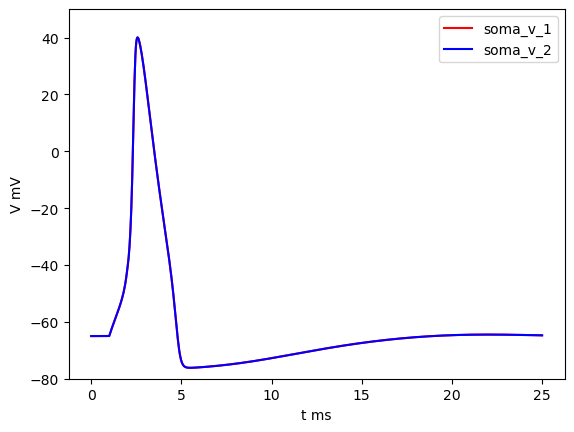

In [ ]:
# IClamp
cell = Cell(type='E', n_idx=0) #n_idx is neuron index

ic = h.IClamp(cell.soma(0.5)) #cell.soma specifies which compartment, 0.5 specifies position along compartment
ic.delay = 1 * ms 
ic.dur = 1 * ms
ic.amp = 0.1 

# Recording Object
soma_v_1 = h.Vector().record(cell.soma(0.5)._ref_v)
soma_v_2 = cell.soma_v
t = h.Vector().record(h._ref_t) # Recording time 

# Simulation
h.finitialize(-65*mV) # Set the initial membrane potential
h.continuerun(25*ms)

# Plot
import matplotlib.pyplot as plt

plt.plot(t, soma_v_1, label='soma_v_1', color='r')
plt.plot(t, soma_v_2, label='soma_v_2', color='b')
plt.ylim([-80, 50])
plt.xlabel('t ms')
plt.ylabel('V mV')
plt.legend()
plt.show()

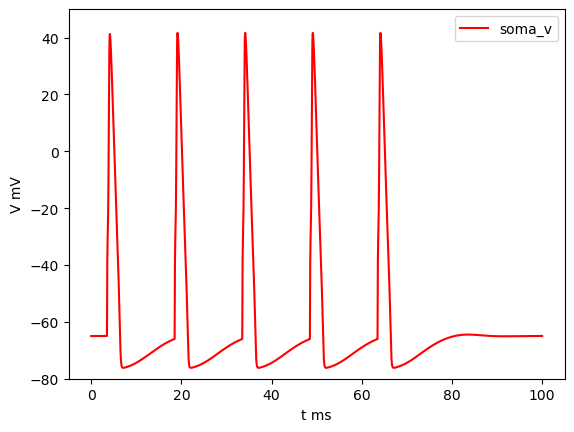

In [ ]:
# ExpSyn, NetStim, NetCon 

cell = Cell(type='E', n_idx=0)

# ExpSyn : Synapse Object
syn = h.ExpSyn(cell.soma(0.5)) 
syn.tau = 0.1 * ms  # Time Constant
syn.e = 0 * mV      # Reversal Potential

# NetStim : Generates a train of presynaptic stimuli
ns = h.NetStim()
ns.interval = 15 * ms
ns.number = 5
ns.start = 1 * ms
ns.noise = 0 # 0 is regular, 1 is Poisson

# NetCon : Network Connection object 
# Synaptic connection between a source and target ; Neuron-Neuron, NetStim-Neruon
nc = h.NetCon(ns, syn)
nc.delay = 2.5 * ms
nc.weight[0] = 0.05

# Recording Object
soma_v = cell.soma_v
t = h.Vector().record(h._ref_t) # Recording time 

# Simulation
h.finitialize(-65*mV) # Set the resting membrane potential
h.continuerun(100*ms)

# Plot
import matplotlib.pyplot as plt

plt.plot(t, soma_v, label='soma_v', color='r')
plt.ylim([-80, 50])
plt.xlabel('t ms')
plt.ylabel('V mV')
plt.legend()
plt.show()



In [11]:
# Network 
n1 = Network(n=200, ratio=0.8, corr='Post', mean=-3, sd=0.75, seed=42, connection=False, scale=1)
n2 = Network(n=200, ratio=0.8, corr='Post', mean=-3, sd=0.75, seed=42, connection=True, scale=1)
n3 = Network(n=200, ratio=0.8, corr='Post', mean=-3, sd=0.75, seed=42, connection=True, scale=1)

# Simulation
networks_list = [n1, n2, n3]
s1 = Simulation(networks=networks_list, run_time=500, poisson=True, seed=42)

# Additional Input to n3 
s1.add_input(add_input_nets=[n3], add_prop=0.2, input_param=(1, 0, 15, 10), input_mode='E')
s1.run()


Simulation complete


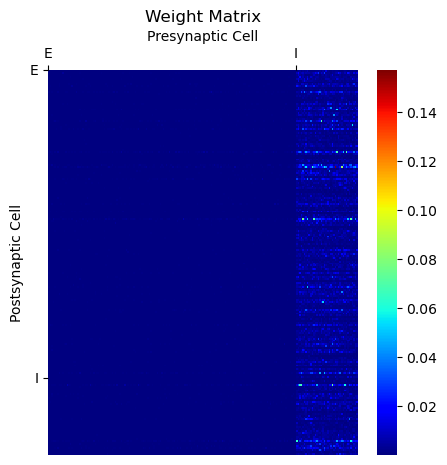

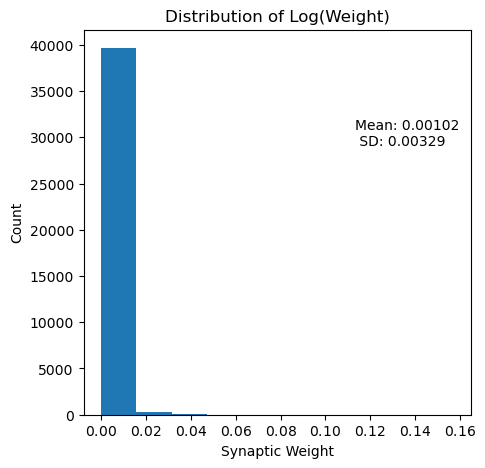

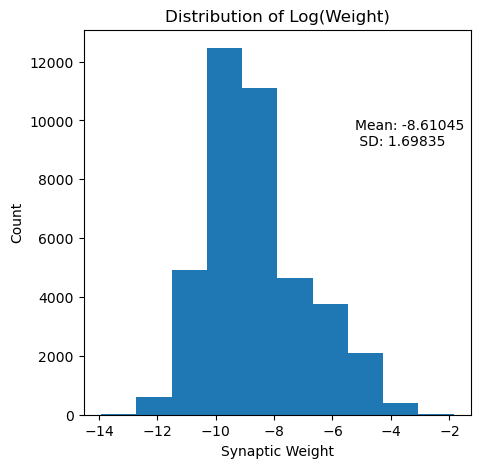

In [10]:
# Results
n2.plot_weight_matrix()
n2.plot_weight_distribution(log=False)
n2.plot_weight_distribution(log=True)

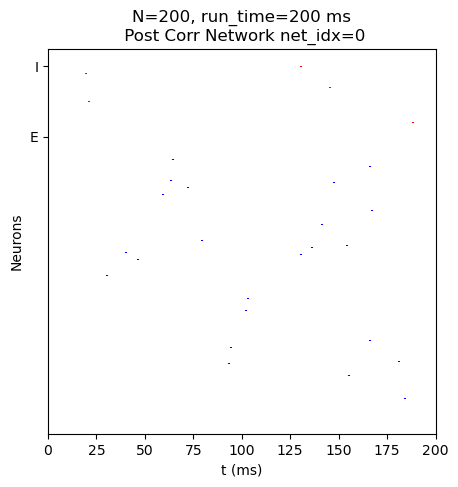

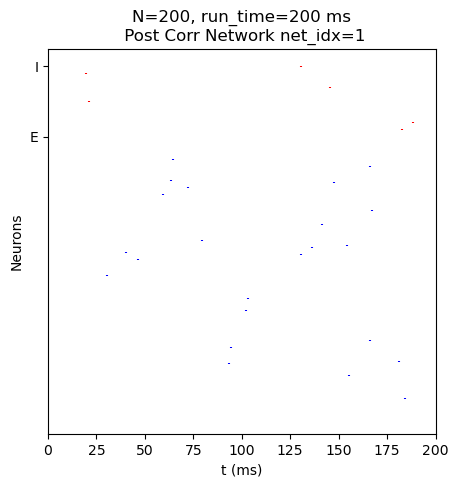

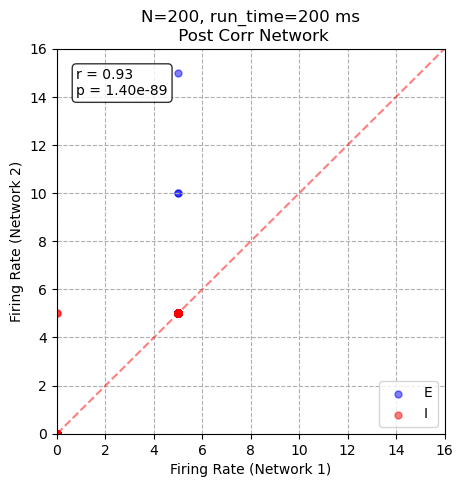

In [9]:
s1.raster_plot(0)
s1.raster_plot(1)
s1.fr_scatter(0,1)